# TOUR PACKAGE PURCHASE PREDICTION 

### Import important packages 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import sklearn

### Load dataset

In [37]:
data=pd.read_csv("tour_package.csv")

In [38]:
data = data.drop_duplicates()

In [39]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [40]:
outliers = []
for feature in data.select_dtypes(include=np.number).columns:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    if data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].any(axis=None):
        outliers.append(feature)

print("Attributes with outliers:", outliers)

#lower_bound = data['column'].quantile(0.05)
#upper_bound = data['column'].quantile(0.95)
#data['column'] = data['column'].clip(lower_bound, upper_boun

Attributes with outliers: ['ProdTaken', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']


In [41]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [42]:
data.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [43]:
median = data["DurationOfPitch"].median()    #replace by median because there are outliers in this column
data["DurationOfPitch"].replace(np.nan,median,inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_16144\2690095979.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["DurationOfPitch"].replace(np.nan,median,inplace=True)


In [44]:
median = data["NumberOfFollowups"].median()    #replace by median because there are outliers in this column
data["NumberOfFollowups"].replace(np.nan,median,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16144\2150786654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["NumberOfFollowups"].replace(np.nan,median,inplace=True)


In [45]:
median = data["NumberOfTrips"].median()    #replace by median because there are outliers in this column
data["NumberOfTrips"].replace(np.nan,median,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16144\3010446884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["NumberOfTrips"].replace(np.nan,median,inplace=True)


In [46]:
median = data["MonthlyIncome"].median()    #replace by median because there are outliers in this column
data["MonthlyIncome"].replace(np.nan,median,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16144\1585534299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["MonthlyIncome"].replace(np.nan,median,inplace=True)


In [47]:
mean = data["Age"].mean()    #replace by mean
data["Age"].replace(np.nan,mean,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16144\4054386851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].replace(np.nan,mean,inplace=True)


In [48]:
mean = data["PreferredPropertyStar"].mean()    #replace by mean
data["PreferredPropertyStar"].replace(np.nan,mean,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16144\1406760560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["PreferredPropertyStar"].replace(np.nan,mean,inplace=True)


In [49]:
mean = data["NumberOfChildrenVisiting"].mean()    #replace by mean
data["NumberOfChildrenVisiting"].replace(np.nan,mean,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_16144\2400043012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["NumberOfChildrenVisiting"].replace(np.nan,mean,inplace=True)


In [50]:
data.dropna(subset = ['TypeofContact'], inplace=True, axis=0)

In [51]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [52]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
if 'ProdTaken' in numerical_columns:
    numerical_columns.remove('ProdTaken')
numerical_columns

['CustomerID',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

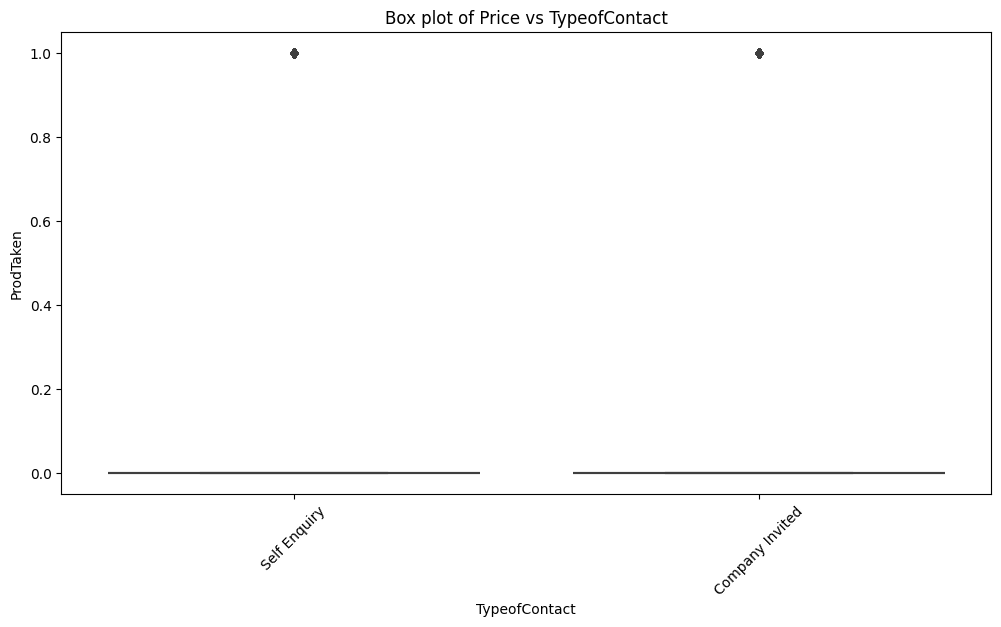

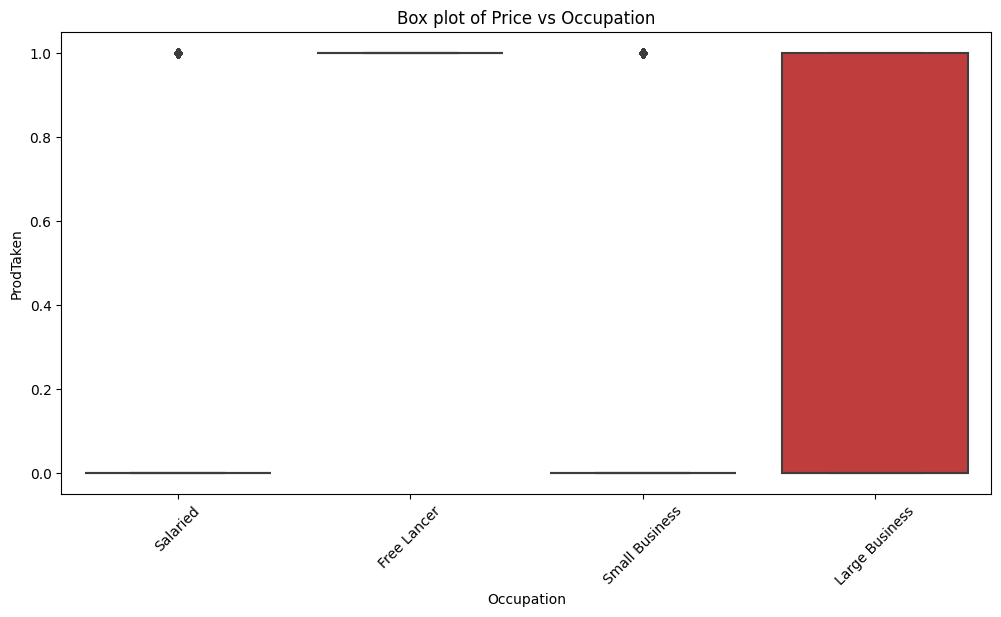

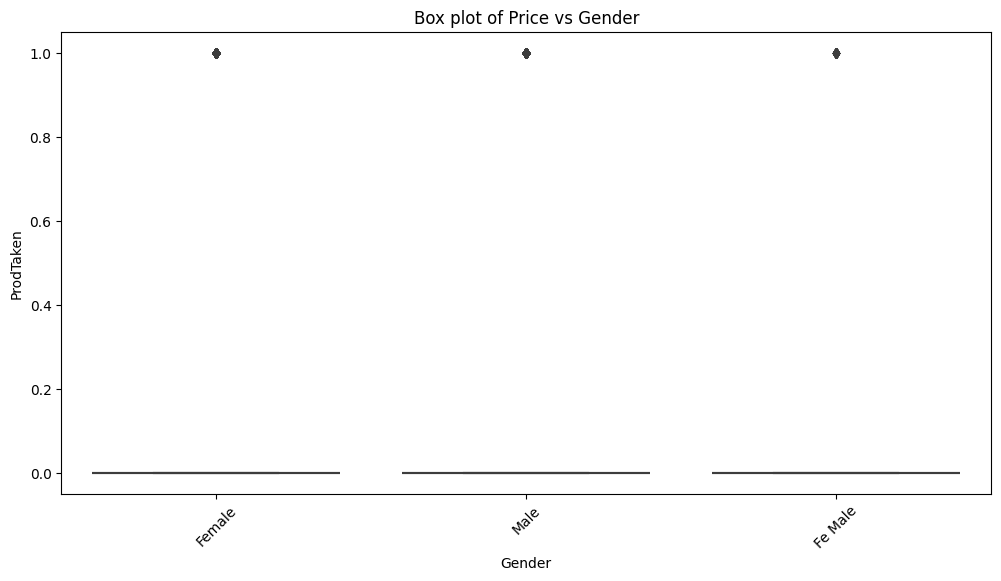

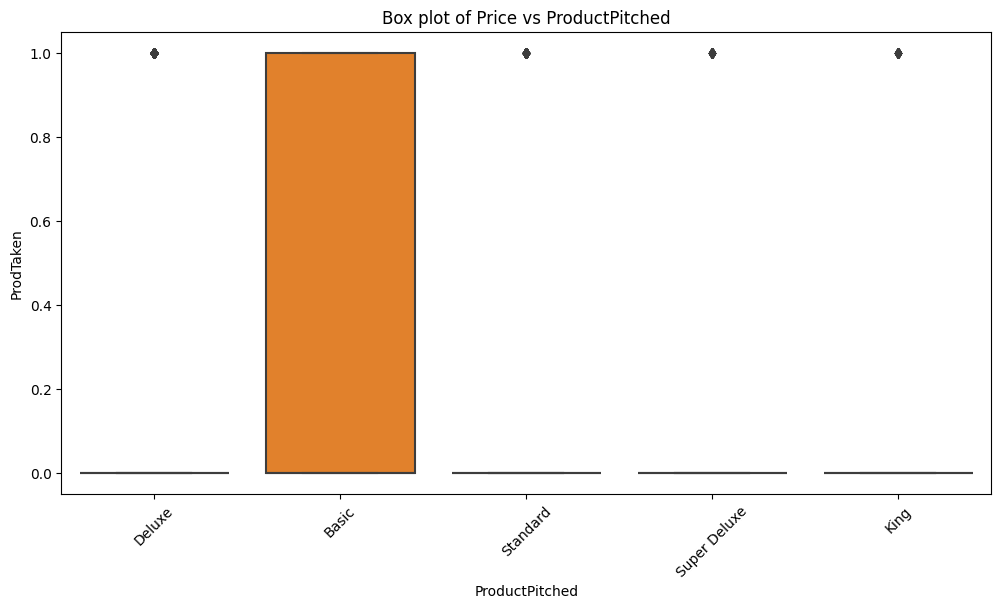

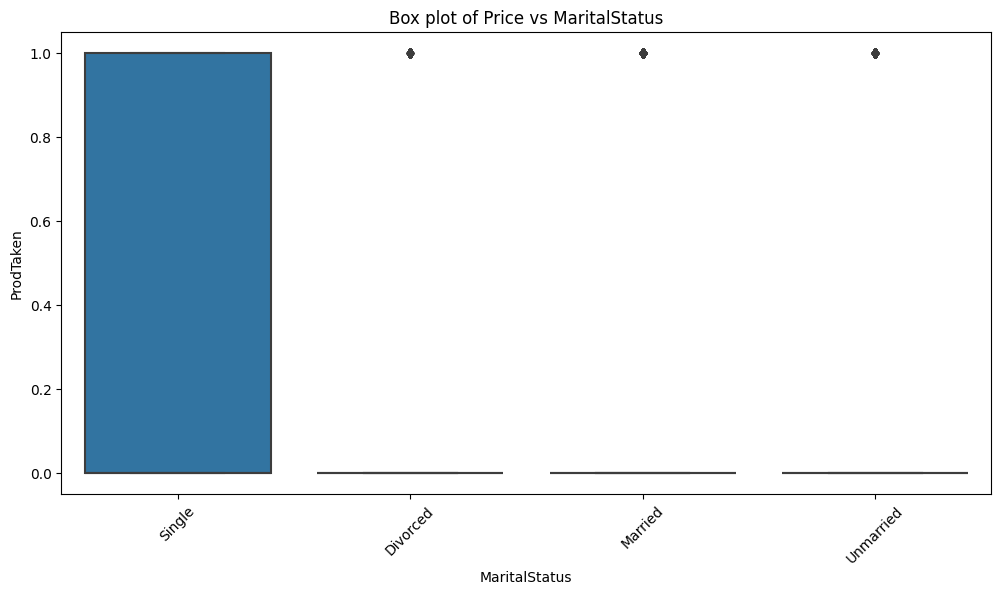

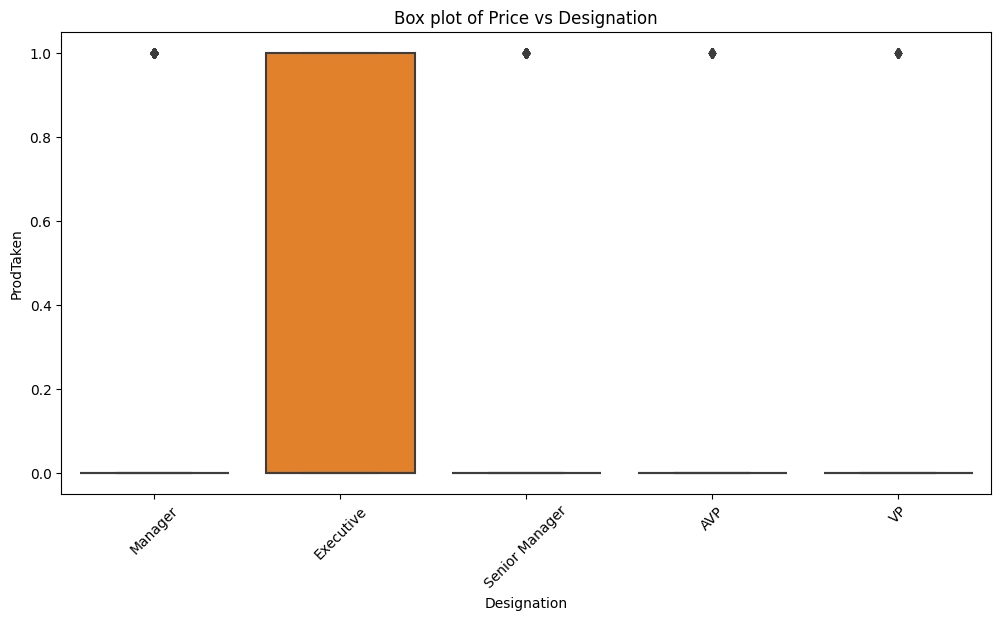

In [53]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()    #boxplot for all the categorical columns
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='ProdTaken', data=data)
    plt.title(f'Box plot of Price vs {col}')
    plt.xticks(rotation=45)
    plt.show()

In [54]:
anova_results = {}
for col in numerical_columns:
    groups = [data['ProdTaken'][data[col] == level] for level in data[col].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = {'F-Value': f_val, 'P-Value': p_val}
    anova_df = pd.DataFrame(anova_results).T
print("ANOVA Results:\n")
print(anova_df)

c:\Users\dell\Desktop\MLproject_TravelPackagePurchasePrediction\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\dell\AppData\Local\Temp\ipykernel_16144\2565568335.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = stats.f_oneway(*groups)


ANOVA Results:

                             F-Value        P-Value
CustomerID                       NaN            NaN
Age                         7.474605   1.745940e-43
CityTier                   19.269487   4.617158e-09
DurationOfPitch             2.654193   9.154094e-07
NumberOfPersonVisiting      2.482836   4.174063e-02
NumberOfFollowups          16.040396   1.031537e-15
PreferredPropertyStar      16.394162   1.343212e-10
NumberOfTrips               4.482442   9.066243e-07
Passport                  355.419939   1.423330e-76
PitchSatisfactionScore      6.384099   4.037677e-05
OwnCar                      0.702363   4.020321e-01
NumberOfChildrenVisiting    0.854237   4.906953e-01
MonthlyIncome               3.111524  4.211048e-163


In [55]:
# Function to apply Chi-Square test
def chi_square_test(data, target_column, categorical_columns):
    results = {}
    for col in categorical_columns:
        contingency_table = pd.crosstab(data[col], data[target_column])
        
        # Apply Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Storing the result in a dictionary
        results[col] = {'chi2_stat': chi2, 'p_value': p_value, 'dof': dof}
        
    return results

# Run the Chi-Square test on your categorical columns
results = chi_square_test(data, 'ProdTaken', categorical_columns)

# Display the results
for col, result in results.items():
    print(f"Column: {col}")
    print(f"Chi-Square Stat: {result['chi2_stat']}, P-value: {result['p_value']}, DOF: {result['dof']}\n")

Column: TypeofContact
Chi-Square Stat: 11.430425385164082, P-value: 0.0007225114229346287, DOF: 1

Column: Occupation
Chi-Square Stat: 33.63774006964942, P-value: 2.3625989147047183e-07, DOF: 3

Column: Gender
Chi-Square Stat: 4.554274766749482, P-value: 0.10257742667411256, DOF: 2

Column: ProductPitched
Chi-Square Stat: 257.97921397395925, P-value: 1.2428940054272477e-54, DOF: 4

Column: MaritalStatus
Chi-Square Stat: 191.0339790711489, P-value: 3.649637167516824e-41, DOF: 3

Column: Designation
Chi-Square Stat: 257.97921397395925, P-value: 1.2428940054272477e-54, DOF: 4



### Important categorical Features include :- 
Occupation , ProductPitched , MaritalStatus , Designation
### Important Numerical Features inlcude :- 
Age , NumberOfFollowups ,Passport ,MonthlyIncome  ,CityTier, PreferredPropertyStar

In [56]:
for i in categorical_columns:
    print(f"Column Name: {i}")
    print(data[i].value_counts())
    print("<<"*30)
    print("<"*60)

Column Name: TypeofContact
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Occupation
Occupation
Salaried          2363
Small Business    2064
Large Business     434
Free Lancer          2
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: Gender
Gender
Male       2901
Female     1807
Fe Male     155
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Column Name: ProductPitched
ProductPitched
Basic           1832
Deluxe          1717
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

here unmarried and single are same
female and fe male are same so we need to handle them 

In [57]:
data["Gender"]=np.where(data["Gender"]=="Fe Male","Female",data["Gender"])

In [58]:
data["MaritalStatus"]=np.where(data["MaritalStatus"]=="Single","Unmarried",data["MaritalStatus"])

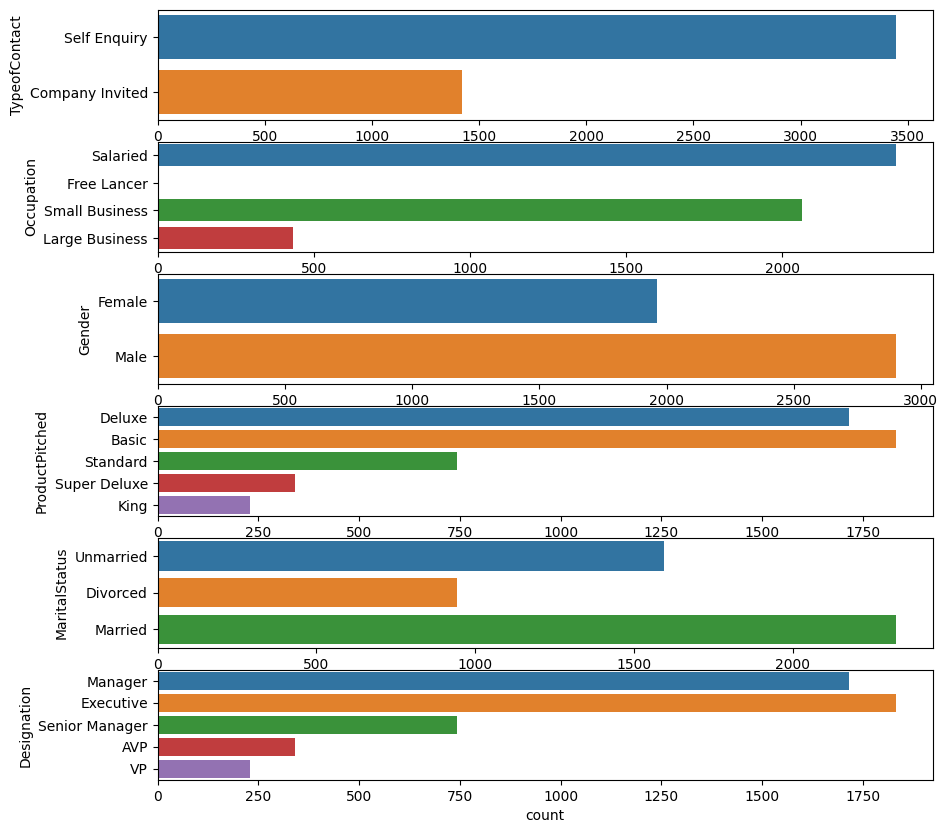

In [59]:
fig, ax= plt.subplots(6, figsize=(10,10), facecolor='w', edgecolor='k')
for i in range(len(categorical_columns)):
    sns.countplot(y=data[categorical_columns[i]],ax=ax[i])

### Observation:
1. **Self Enquiry** is has been done by most of the customers
2. Most of the Customers are **Salaried and Small Bussiness**.
3. **Male** customer are **more** than **female** customers
4. From the Productpitched **Basic** has been taken most wheather **King** very less.
5. Most of the Customer are **Married**.
6. Destination of Most of the Customer is **Executive** and **Manager** and Less is **VP**.

In [60]:
for i in range(len(categorical_columns)):
    print(data.groupby(["ProdTaken",categorical_columns[i]]).size())
    print(">"*80)

ProdTaken  TypeofContact  
0          Company Invited    1109
           Self Enquiry       2837
1          Company Invited     310
           Self Enquiry        607
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Occupation    
0          Large Business     314
           Salaried          1950
           Small Business    1682
1          Free Lancer          2
           Large Business     120
           Salaried           413
           Small Business     382
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  Gender
0          Female    1620
           Male      2326
1          Female     342
           Male       575
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
ProdTaken  ProductPitched
0          Basic             1283
           Deluxe            1513
           King               210
           Standard           618
   

In [61]:
df_encoded = data.copy()
binary_columns = ['Gender','ProdTaken']   #Binary encoding 
label_encoder = LabelEncoder()
for col in binary_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# One-Hot Encoding other categorical columns
categorical_columns = ['TypeofContact', 'Occupation', 'ProductPitched', 
                       'MaritalStatus', 'Designation']

df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
print(df_encoded.head())
data = df_encoded

   CustomerID  ProdTaken        Age  CityTier  DurationOfPitch  Gender  \
0      200000          1  41.000000         3              6.0       0   
1      200001          0  49.000000         1             14.0       1   
2      200002          1  37.000000         1              8.0       1   
3      200003          0  33.000000         1              9.0       0   
4      200004          0  37.622265         1              8.0       1   

   NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
0                       3                3.0                    3.0   
1                       3                4.0                    4.0   
2                       3                4.0                    3.0   
3                       2                3.0                    3.0   
4                       2                3.0                    4.0   

   NumberOfTrips  ...  ProductPitched_Deluxe  ProductPitched_King  \
0            1.0  ...                   True               

In [62]:
#  apply decision tree, random forest , KNN , support vector machine , logistic regression using grid cv method 

X = data.drop('ProdTaken', axis=1)
y = data['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

from scipy.sparse import issparse

if issparse(X_train):
    X_train = X_train.toarray()
if issparse(X_test):
    X_test = X_test.toarray()


# Define models and parameter grids
models = {
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]})
}


results = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',refit= True )
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {'best_params': grid_search.best_params_, 'accuracy': accuracy}
    print(f"{name}: Best parameters - {grid_search.best_params_}, Accuracy - {accuracy}")

results

Decision Tree: Best parameters - {'max_depth': 20}, Accuracy - 0.8972250770811921
Random Forest: Best parameters - {'max_depth': 20, 'n_estimators': 200}, Accuracy - 0.9064748201438849
KNN: Best parameters - {'n_neighbors': 9}, Accuracy - 0.7923946557040082
SVM: Best parameters - {'C': 0.1, 'kernel': 'linear'}, Accuracy - 0.7954779033915724


c:\Users\dell\Desktop\MLproject_TravelPackagePurchasePrediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dell\Desktop\MLproject_TravelPackagePurchasePrediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Logistic Regression: Best parameters - {'C': 1}, Accuracy - 0.8263103802672148


c:\Users\dell\Desktop\MLproject_TravelPackagePurchasePrediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Decision Tree': {'best_params': {'max_depth': 20},
  'accuracy': 0.8972250770811921},
 'Random Forest': {'best_params': {'max_depth': 20, 'n_estimators': 200},
  'accuracy': 0.9064748201438849},
 'KNN': {'best_params': {'n_neighbors': 9}, 'accuracy': 0.7923946557040082},
 'SVM': {'best_params': {'C': 0.1, 'kernel': 'linear'},
  'accuracy': 0.7954779033915724},
 'Logistic Regression': {'best_params': {'C': 1},
  'accuracy': 0.8263103802672148}}

In [63]:
#Gradient Boosting (Boosting-Based Ensemble)
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting with specific parameters
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit and evaluate the model
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy}")


Gradient Boosting Classifier Accuracy: 0.8530318602261048


In [64]:
#Random forest (Bagging based esembled learning)
from sklearn.ensemble import RandomForestClassifier

# Random Forest with specific parameters
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit and evaluate the model
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.8674203494347379


In [65]:
#Stacking with XGBoost
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('Random Forest', RandomForestClassifier(n_estimators=100)),
        ('XGBoost', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'))
    ],
    final_estimator=LogisticRegression()
)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking with XGBoost Accuracy: {accuracy}")


c:\Users\dell\Desktop\MLproject_TravelPackagePurchasePrediction\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\dell\Desktop\MLproject_TravelPackagePurchasePrediction\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking with XGBoost Accuracy: 0.9229188078108942


In [66]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42,verbose=-1)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 70],  # Controls complexity
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid, 
                               scoring='accuracy', cv=5, verbose=1)

# Fit the model
grid_search_lgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = grid_search_lgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {grid_search_lgb.best_params_}")
print(f"LightGBM Accuracy: {accuracy}")




Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\dell\Desktop\MLproject_TravelPackagePurchasePrediction\venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 70, 'subsample': 0.8}
LightGBM Accuracy: 0.934224049331963


In [70]:

import pickle

best_model = grid_search_lgb.best_estimator_
with open('lightgbm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully.")


Model saved successfully.


In [68]:

import pkg_resources

installed_packages = pkg_resources.working_set
for package in installed_packages:
    print(f"{package.key}=={package.version}")


ModuleNotFoundError: No module named 'pkg_resources'

In [ ]:
import json
import re

# Path to your notebook file
notebook_path = "Travel package prediction  .ipynb"

# Read the notebook content
with open(notebook_path, 'r', encoding='utf-8') as file:
    notebook_data = json.load(file)

# Extract all code cells
code_cells = [cell['source'] for cell in notebook_data['cells'] if cell['cell_type'] == 'code']

# Find all imported modules
imported_modules = set()
pattern = re.compile(r"^\s*(import\s+\w+|from\s+\w+\s+import\s+)", re.MULTILINE)

for cell in code_cells:
    matches = pattern.findall("".join(cell))
    for match in matches:
        imported_modules.add(match.strip())

# Display unique imports
print("Modules imported in the notebook:")
for module in sorted(imported_modules):
    print(module)


Modules imported in the notebook:
from xgboost import
import importlib
import json
import lightgbm
import matplotlib
import numpy
import pandas
import pickle
import pkg_resources
import re
import scipy
import seaborn
import sklearn


In [ ]:
import importlib
import pkg_resources

# List of modules imported in the notebook
modules = [
    "xgboost",
    "lightgbm",
    "matplotlib",
    "numpy",
    "pandas",
    "pickle",  # Standard library, no version
    "scipy",
    "seaborn"
]

print("Module Versions:")
for module in modules:
    try:
        # Try importing the module
        lib = importlib.import_module(module)
        # Get version via __version__ or pkg_resources
        version = getattr(lib, '__version__', pkg_resources.get_distribution(module).version)
        print(f"{module}: {version}")
    except ModuleNotFoundError:
        print(f"{module}: Not installed")
    except Exception as e:
        print(f"{module}: Error determining version ({e})")


Module Versions:
xgboost: 2.1.0
lightgbm: 4.5.0
matplotlib: 3.7.2
numpy: 1.24.3
pandas: 2.0.3
pickle: Error determining version (The 'pickle' distribution was not found and is required by the application)
scipy: 1.11.1
seaborn: 0.12.2


In [ ]:
print("Sckit-learn : ",sklearn.__version__)

Sckit-learn :  1.3.0


In [ ]:
# Test input (use realistic values)
test_input = [220002,30, 2, 15,1,2, 4, 5, 1, 1,2, 0, 2, 50000,1,1,0,0,0,0,1,0,1,0,1,0,0,0]
# Replace with actual values
test_array = np.array([test_input])

# Make prediction
print(grid_search_lgb .predict(test_array))

[1]


In [ ]:
print(grid_search_lgb )


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42, verbose=-1),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 70], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)


In [ ]:
import lightgbm as lgb

# Save the LightGBM model
grid_search_lgb .save_model('lightgbm_model.txt')

# Load the LightGBM model
grid_search_lgb  = lgb.Booster(model_file='lightgbm_model.txt')


AttributeError: 'GridSearchCV' object has no attribute 'save_model'

In [ ]:
print(data.columns)



Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'MonthlyIncome', 'TypeofContact_Self Enquiry',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'ProductPitched_Deluxe',
       'ProductPitched_King', 'ProductPitched_Standard',
       'ProductPitched_Super Deluxe', 'MaritalStatus_Married',
       'MaritalStatus_Unmarried', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')


In [ ]:
X_train = data[feature_list].values

NameError: name 'feature_list' is not defined

In [ ]:
print("X_train shape:", X_train.shape)  # Number of rows and features



X_train shape: (3890, 28)
